In [0]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K


Using TensorFlow backend.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [0]:
def mnist_scatter(x, colors):
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    
    txts = []

    for i in range(num_classes):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
from sklearn.decomposition import PCA

time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 3.162144660949707 seconds
Cumulative variance explained by 50 principal components: 0.8270354124000419


In [0]:
import time
from sklearn.manifold import TSNE
time_start = time.time()


mnist_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 287.08811259269714 seconds


(<matplotlib.figure.Figure at 0x7f76ad714438>,
 [Text(-45.1466,-42.9484,'0'),
  Text(56.5001,-20.3785,'1'),
  Text(13.0371,-58.9941,'2'),
  Text(-9.26271,-25.0062,'3'),
  Text(1.25023,51.9755,'4'),
  Text(-29.7735,15.137,'5'),
  Text(-61.2958,7.79359,'6'),
  Text(45.4216,43.8289,'7'),
  Text(16.2211,-3.6142,'8'),
  Text(6.24014,39.2435,'9')])

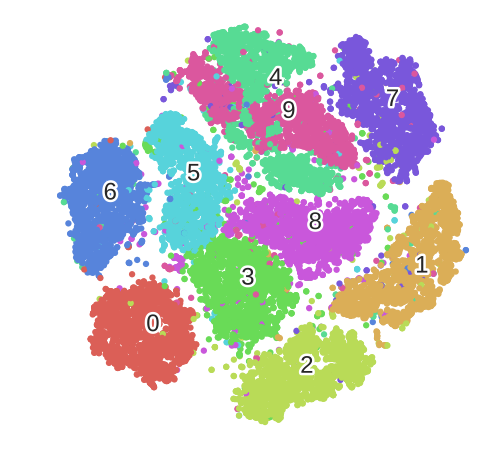

In [0]:
mnist_scatter(mnist_pca_tsne, y_subset)

In [0]:
print(mnist_pca_tsne[:10])

[[-20.67261    10.501249 ]
 [-40.270966  -47.104095 ]
 [-15.152075   69.645065 ]
 [ 64.33933     2.055059 ]
 [  7.448148   34.453743 ]
 [  1.782282  -71.459496 ]
 [ 29.56366   -29.873232 ]
 [ -4.374458  -32.526985 ]
 [ 35.801025  -34.815243 ]
 [ 12.5496855  15.1307745]]


In [0]:
from sklearn.cluster import KMeans  

kmeans = KMeans(n_clusters=10)
kmeans.fit(mnist_pca_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
ans=kmeans.predict(mnist_pca_tsne)

In [0]:

a=np.zeros([10,10])
for i in range(len(ans)):
  a[y_subset[i]][ans[i]]+=1

a=a.astype(int)  
print(a)

[[   0    0    0    4    1 1981    6    1    1    0]
 [   3    3   74    0 2040    0    1    5    0  155]
 [  31    8 1844    2   14    7    4    3   12    4]
 [  13 1870   74    9    8    3    3   16   53   27]
 [   2    0    2 1185   21    0   12  665   27   31]
 [   1   92    2   11    2    1   24    2 1637    3]
 [   0    1    0   13    7    9 1925    0   16    0]
 [2006    0    5   37   14    0    0   25    0    6]
 [   4  184    4    3    8    5   12   21   88 1593]
 [  37   28    5  771    4   10    2 1143    5    9]]
